# Obtaining data

Importing library and generating Yahoo Finance link

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
# enter inputs here including ticker and start and end date here
symbol = 'GSPC'
start_date = '2002-01-01'
end_date = '2020-11-30'

In [3]:
start= datetime.datetime(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10])).timestamp()
end = datetime.datetime(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10])).timestamp()

url_string = "https://finance.yahoo.com/quote/%5E{}/history?".format(symbol)
url_string += "period1={0}&period2={1}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true".format(int(start), int(end))


Inputs to generate URL link for S&P stock form 1 Jan 2002 up to 30 Nov 2020

In [4]:
print(url_string)

https://finance.yahoo.com/quote/%5EGSPC/history?period1=1009814400&period2=1606665600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


Open up link and click download to get CSV file , file name will be ^GSPC.csv in this case for S&P500

## Preprocess data

In [5]:
filename = '^'+symbol

data = pd.read_csv(filename + '.csv')

data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = np.arange(1,len(data)+1)
print(len(data))
#print(type(data0))
#data = data0.set_index('Date')

4762


In [6]:
# Getting an idea of how the dataset looks like
print(data.tail())
print(data.head())

           Date         Open         High          Low        Close  \
4758 2020-11-20  3579.310059  3581.229980  3556.850098  3557.540039   
4759 2020-11-23  3566.820068  3589.810059  3552.770020  3577.590088   
4760 2020-11-24  3594.520020  3642.310059  3594.520020  3635.409912   
4761 2020-11-25  3635.500000  3635.500000  3617.760010  3629.649902   
4762 2020-11-27  3638.550049  3644.310059  3629.330078  3638.350098   

        Adj Close      Volume  
4758  3557.540039  4218970000  
4759  3577.590088  5036290000  
4760  3635.409912  6267570000  
4761  3629.649902  4902560000  
4762  3638.350098  2778450000  
        Date         Open         High          Low        Close    Adj Close  \
1 2001-12-31  1161.020020  1161.160034  1148.040039  1148.079956  1148.079956   
2 2002-01-02  1148.079956  1154.670044  1136.229980  1154.670044  1154.670044   
3 2002-01-03  1154.670044  1165.270020  1154.010010  1165.270020  1165.270020   
4 2002-01-04  1165.270020  1176.550049  1163.420044  1172

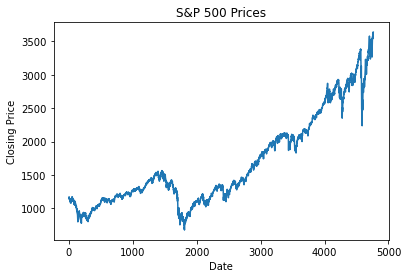

In [7]:
#plotting prices on a graph to see overview

import matplotlib.pyplot as plt
data.Close.plot()

plt.title('S&P 500 Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

# Benchmark Model - Linear Regression

Adding an additional field
1. Simple Moving Average 

In [8]:
# Adding Simple Moving Average column for 50 days 
data['SMA']=data.Close.rolling(50,win_type = 'triang').mean()


In [9]:
data.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
1,2001-12-31,1161.020020,1161.160034,1148.040039,1148.079956,1148.079956,943600000,NaN
2,2002-01-02,1148.079956,1154.670044,1136.229980,1154.670044,1154.670044,1171000000,NaN
3,2002-01-03,1154.670044,1165.270020,1154.010010,1165.270020,1165.270020,1398900000,NaN
4,2002-01-04,1165.270020,1176.550049,1163.420044,1172.510010,1172.510010,1513000000,NaN
5,2002-01-07,1172.510010,1176.969971,1163.550049,1164.890015,1164.890015,1308300000,NaN
6,2002-01-08,1164.890015,1167.599976,1157.459961,1160.709961,1160.709961,1258800000,NaN


In [12]:
# cleaning up the data such that each row has a data input for each header
clean_data = data[51:]
clean_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
52,2002-03-15,1153.040039,1166.479980,1153.040039,1166.160034,1166.160034,1493900000,1114.914037
53,2002-03-18,1166.160034,1172.729980,1159.140015,1165.550049,1165.550049,1169500000,1114.874101
54,2002-03-19,1165.550049,1173.939941,1165.550049,1170.290039,1170.290039,1255000000,1115.040005
55,2002-03-20,1170.290039,1170.290039,1151.609985,1151.849976,1151.849976,1304900000,1115.382437
56,2002-03-21,1151.849976,1155.099976,1139.479980,1153.589966,1153.589966,1339200000,1115.868086


In [13]:
# checking the total number of rows of data

len(clean_data)

4711

In [14]:
#reset index
clean_data.reset_index(drop=True, inplace=True)

In [15]:
clean_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
0,2002-03-15,1153.040039,1166.479980,1153.040039,1166.160034,1166.160034,1493900000,1114.914037
1,2002-03-18,1166.160034,1172.729980,1159.140015,1165.550049,1165.550049,1169500000,1114.874101
2,2002-03-19,1165.550049,1173.939941,1165.550049,1170.290039,1170.290039,1255000000,1115.040005
3,2002-03-20,1170.290039,1170.290039,1151.609985,1151.849976,1151.849976,1304900000,1115.382437
4,2002-03-21,1151.849976,1155.099976,1139.479980,1153.589966,1153.589966,1339200000,1115.868086


In [16]:
# checking that no NaN values before proceeding
clean_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SMA          0
dtype: int64

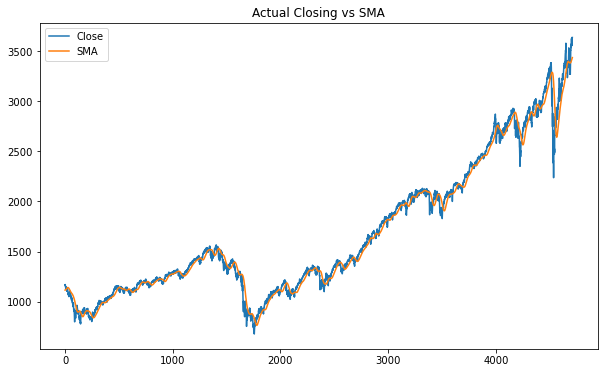

In [17]:
# Plotting graph of actual closing price vs SMA for 50 days

clean_data[['Close', 'SMA']].plot(title='Actual Closing vs SMA',figsize=(10,6))

Train-test split for Linear Regression

In [18]:
# using a 80% percentage for train-test split
split = len(clean_data)*0.80
print(int(split))

3768


In [19]:
train = clean_data[:3700]
test = clean_data[3700:]
train.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
0,2002-03-15,1153.040039,1166.479980,1153.040039,1166.160034,1166.160034,1493900000,1114.914037
1,2002-03-18,1166.160034,1172.729980,1159.140015,1165.550049,1165.550049,1169500000,1114.874101
2,2002-03-19,1165.550049,1173.939941,1165.550049,1170.290039,1170.290039,1255000000,1115.040005
3,2002-03-20,1170.290039,1170.290039,1151.609985,1151.849976,1151.849976,1304900000,1115.382437
4,2002-03-21,1151.849976,1155.099976,1139.479980,1153.589966,1153.589966,1339200000,1115.868086
5,2002-03-22,1153.589966,1156.489990,1144.599976,1148.699951,1148.699951,1243300000,1116.472262


Dropping columns that will not be in the preprocessed data to reduce overfitting

In [20]:
x_train = train.drop(['Close','Date','Adj Close','High','Low','Open'], axis=1)
y_train = train['Close']
x_test = test.drop(['Close','Date','Adj Close','High','Low','Open'], axis=1)
y_test = test['Close']

In [21]:
x_train.head()

,Volume,SMA
0,1493900000,1114.914037
1,1169500000,1114.874101
2,1255000000,1115.040005
3,1304900000,1115.382437
4,1339200000,1115.868086


In [22]:
y_train.head()

0    1166.160034
1    1165.550049
2    1170.290039
3    1151.849976
4    1153.589966
Name: Close, dtype: float64

In [23]:
test.shape

(1011, 8)

Implementing the Linear Regression benchmark model

In [24]:
# implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
import numpy as np
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

135.58947263877997

In [26]:
df = pd.Series(preds)
df.describe()

count    1011.000000
mean     2780.089804
std       309.699606
min      2140.595146
25%      2573.748335
50%      2770.869217
75%      2967.858917
max      3468.274475
dtype: float64

<ipython-input-27-c3394a6a5a8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = 0
<ipython-input-27-c3394a6a5a8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds
No handles with labels found to put in legend.


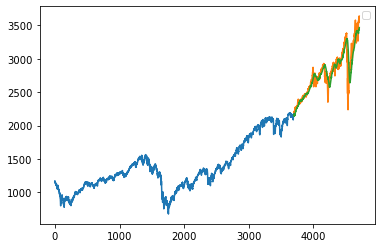

In [27]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

test.index = clean_data[3700:].index
train.index = clean_data[:3700].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend()



# LSTM


In [29]:
!pip install keras
!pip install tensorflow

Preprocessing data for LSTM Model

In [30]:
clean_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
0,2002-03-15,1153.040039,1166.479980,1153.040039,1166.160034,1166.160034,1493900000,1114.914037
1,2002-03-18,1166.160034,1172.729980,1159.140015,1165.550049,1165.550049,1169500000,1114.874101
2,2002-03-19,1165.550049,1173.939941,1165.550049,1170.290039,1170.290039,1255000000,1115.040005
3,2002-03-20,1170.290039,1170.290039,1151.609985,1151.849976,1151.849976,1304900000,1115.382437
4,2002-03-21,1151.849976,1155.099976,1139.479980,1153.589966,1153.589966,1339200000,1115.868086


In [31]:
dataLSTM = clean_data.sort_index(ascending=True, axis=0)
dataLSTM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
0,2002-03-15,1153.040039,1166.479980,1153.040039,1166.160034,1166.160034,1493900000,1114.914037
1,2002-03-18,1166.160034,1172.729980,1159.140015,1165.550049,1165.550049,1169500000,1114.874101
2,2002-03-19,1165.550049,1173.939941,1165.550049,1170.290039,1170.290039,1255000000,1115.040005
3,2002-03-20,1170.290039,1170.290039,1151.609985,1151.849976,1151.849976,1304900000,1115.382437
4,2002-03-21,1151.849976,1155.099976,1139.479980,1153.589966,1153.589966,1339200000,1115.868086


In [32]:
new_data = pd.DataFrame(index=range(0,len(clean_data)),columns=['Date', 'Close'])

In [33]:
new_data['Date']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4706    NaN
4707    NaN
4708    NaN
4709    NaN
4710    NaN
Name: Date, Length: 4711, dtype: object

In [34]:
len(dataLSTM)

4711

In [35]:
for i in range(0,len(dataLSTM)):
    new_data['Date'][i] = dataLSTM['Date'][i]
    new_data['Close'][i] = dataLSTM['Close'][i]

In [36]:
new_data['Close']

0       1166.16
1       1165.55
2       1170.29
3       1151.85
4       1153.59
         ...   
4706    3557.54
4707    3577.59
4708    3635.41
4709    3629.65
4710    3638.35
Name: Close, Length: 4711, dtype: object

In [38]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [39]:
new_data.head()

,Close
Date,
2002-03-15,1166.16
2002-03-18,1165.55
2002-03-19,1170.29
2002-03-20,1151.85
2002-03-21,1153.59


Once data is processed for LSTM to start importing and processing

In [40]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [41]:
#creating train and test sets using a train-test split of approx 80%
dataset = new_data.values

train = dataset[0:3700,:]
test = dataset[3700:,:]

In [43]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [44]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=75))
model.add(Dropout(0.2))
model.add(Dense(1))

In [47]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split = 0.1, verbose=2)

#predicting using past data from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/25
26/26 - 4s - loss: 6.1937e-04 - val_loss: 1.4025e-04
Epoch 2/25
26/26 - 4s - loss: 2.5169e-04 - val_loss: 1.8193e-04
Epoch 3/25
26/26 - 4s - loss: 2.5696e-04 - val_loss: 1.3283e-04
Epoch 4/25
26/26 - 4s - loss: 2.3715e-04 - val_loss: 2.2084e-04
Epoch 5/25
26/26 - 4s - loss: 2.5299e-04 - val_loss: 1.4846e-04
Epoch 6/25
26/26 - 4s - loss: 2.4412e-04 - val_loss: 2.5606e-04
Epoch 7/25
26/26 - 3s - loss: 2.3517e-04 - val_loss: 2.3813e-04
Epoch 8/25
26/26 - 3s - loss: 2.1907e-04 - val_loss: 3.7895e-04
Epoch 9/25
26/26 - 4s - loss: 2.3707e-04 - val_loss: 1.2165e-04
Epoch 10/25
26/26 - 3s - loss: 2.0240e-04 - val_loss: 1.2309e-04
Epoch 11/25
26/26 - 3s - loss: 2.1425e-04 - val_loss: 1.2582e-04
Epoch 12/25
26/26 - 3s - loss: 2.2785e-04 - val_loss: 1.1995e-04
Epoch 13/25
26/26 - 4s - loss: 2.2777e-04 - val_loss: 1.3017e-04
Epoch 14/25
26/26 - 3s - loss: 2.0095e-04 - val_loss: 1.2404e-04
Epoch 15/25
26/26 - 3s - loss: 1.9130e-04 - val_loss: 2.5126e-04
Epoch 16/25
26/26 - 3s - loss: 1.9

In [48]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

71.48414079543073

<ipython-input-49-7bce2710a5b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = closing_price


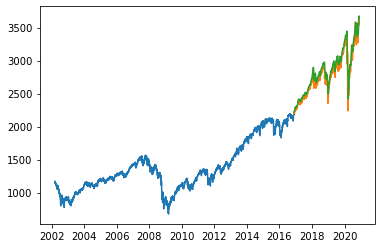

In [49]:
#for plotting
train = new_data[:3700]
test = new_data[3700:]
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])